In [1]:
import sys, os

cur_dir = os.getcwd()
print(cur_dir)

sys.path.append(cur_dir)

print(cur_dir)

import numpy as np
import pandas as pd

import importlib
import data_parser as dp
importlib.reload(dp)

beluga18 = dp.read_data("controlplane_result/beluga18")


/Users/hnamkung/workspace/sketch_home/result_plots/SketchLib/210805_section31
/Users/hnamkung/workspace/sketch_home/result_plots/SketchLib/210805_section31


In [2]:
# import numpy as np
# np_data = np.array(beluga18)
# print(np_data.shape) # txt width, row, pcap, opt, metric

def reshape3(array):
    np1 = np.array(array)
    print(np1.shape) # txt, width, row, pcap, opt, metric
    
    np1 = np.swapaxes(np1, 0, 5)
    print(np1.shape) # metric, width, row, pcap, opt, txt

    np1 = np.swapaxes(np1, 3, 4)
    np1 = np.swapaxes(np1, 4, 5)
    print(np1.shape) # metric, width, row, opt, txt, pcap

    np1 = np.swapaxes(np1, 2, 3)
    np1 = np.swapaxes(np1, 1, 2)
    print(np1.shape) # metric, opt, width, row, tx, pcap
    
    reshaped_array = np1.tolist()

    return reshaped_array

data = reshape3(beluga18)


(10, 3, 4, 120, 1, 3)
(3, 3, 4, 120, 1, 10)
(3, 3, 4, 1, 10, 120)
(3, 1, 3, 4, 10, 120)


(3, 4, 10, 120)


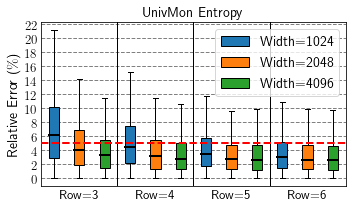

In [9]:
entropy = np.array(data[2][0])
print(entropy.shape)
plot_data = []
labels = []
colors = []

for di, d in enumerate([3, 4, 5, 6]):
    for wi, w in enumerate([1024, 2048, 4096]):
        whole_data = []
#         print(wi, di)
        for i in range(0, 10):
#             print(i)
            whole_data = [*whole_data, *entropy[wi][di][i]]
#         print(whole_data)
        plot_data.append(whole_data)
        labels.append(" ")
        colors.append("C%d" % wi)

import plot as csp
importlib.reload(csp)
csp.count_sketch_plot(plot_data, "univmon-entropy", labels, colors, (5, 3))

